<a href="https://colab.research.google.com/github/vinods03/deep_learning/blob/main/CNN_Document_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
base_dir = '/content/drive/MyDrive/DocumentClassification'

In [4]:
folders = []

import os
for i in os.listdir(base_dir):
  folders.append(os.path.join(base_dir, i))

folders

['/content/drive/MyDrive/DocumentClassification/email',
 '/content/drive/MyDrive/DocumentClassification/resume',
 '/content/drive/MyDrive/DocumentClassification/scientific_publication']

In [5]:
dataset = []

for i in range(0, len(folders)):
  for j in os.listdir(folders[i]):
    dataset.append(os.path.join(folders[i], j))

# dataset
len(dataset)

165

In [6]:
translate = {'email':0,'resume':1,'scientific_publication':2}
reverse_translate = {0:'email',1:'resume',2:'scientific_publication'}

In [7]:
# convert one sample image into an array

from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/DocumentClassification/email/doc_000042.png', target_size = (256,256))
img = img_to_array(img)
img = img/255
img

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.972549  , 0.972549  , 0.972549  ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

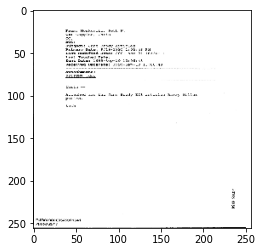

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [9]:
dataset

['/content/drive/MyDrive/DocumentClassification/email/doc_000195.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000133.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000275.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000115.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000260.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000042.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000238.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000142.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000196.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000079.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000111.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000076.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000046.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000255.png',
 '/con

In [10]:
image_array = []
image_label = []

for i in dataset:
  img = load_img(i, target_size = (256,256))
  img = img_to_array(img)
  img = img/255
  image_array.append(img)
  label = translate[i.split('/')[-2]]
  image_label.append(label)


In [11]:
import numpy as np

image_array = np.array(image_array)
image_label = np.array(image_label)

print(image_array.shape)
print(image_label.shape)

(165, 256, 256, 3)
(165,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_array, image_label, test_size = 0.2)

In [13]:
c = len(set(y_train))
print('The number of distinct classes in training data is', c)

d = len(set(y_test))
print('The number of distinct classes in test data is', d)

The number of distinct classes in training data is 3
The number of distinct classes in test data is 3


In [14]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Flatten, GlobalMaxPooling2D, Dropout, Dense
from tensorflow.keras.models import Model

In [15]:
X_train[0].shape

i = Input(shape = X_train[0].shape)

x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)

x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

x = Conv2D(256, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

# x = Flatten()(x)
x = GlobalMaxPooling2D()(x)

x = Dropout(0.2)(x)
x = Dense(256, activation = 'relu')(x)

x = Dropout(0.2)(x)
x = Dense(128, activation = 'relu')(x)

x = Dropout(0.2)(x)
x = Dense(64, activation = 'relu')(x)

x = Dropout(0.2)(x)
x = Dense(c, activation = 'softmax' )(x)

m = Model(i, x)

In [16]:
# opt = tf.keras.optimizers.Adam(0.0001)
# m.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# r = m.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

m.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
r = m.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20
5/5 [==============================] - 13s 203ms/step - loss: 3.8972 - accuracy: 0.3864 - val_loss: 1.0994 - val_accuracy: 0.3030
Epoch 2/20
5/5 [==============================] - 0s 43ms/step - loss: 1.5620 - accuracy: 0.3864 - val_loss: 1.0990 - val_accuracy: 0.3030
Epoch 3/20
5/5 [==============================] - 0s 43ms/step - loss: 1.4039 - accuracy: 0.3712 - val_loss: 1.0996 - val_accuracy: 0.3030
Epoch 4/20
5/5 [==============================] - 0s 42ms/step - loss: 1.3764 - accuracy: 0.3561 - val_loss: 1.0995 - val_accuracy: 0.3333
Epoch 5/20
5/5 [==============================] - 0s 44ms/step - loss: 1.0753 - accuracy: 0.5227 - val_loss: 1.0979 - val_accuracy: 0.3636
Epoch 6/20
5/5 [==============================] - 0s 41ms/step - loss: 1.0912 - accuracy: 0.4470 - val_loss: 1.0999 - val_accuracy: 0.2727
Epoch 7/20
5/5 [==============================] - 0s 43ms/step - loss: 1.0418 - accuracy: 0.5000 - val_loss: 1.0988 - val_accuracy: 0.3636
Epoch 8/20
5/5 [=========

In [17]:
batch_size = 18
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1)
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    # rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    # horizontal_flip=True,
    # rescale=1./255,
    # shear_range=0.2,
    zoom_range=0.2)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = m.fit_generator(train_generator, validation_data = (X_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/50
7/7 [==============================] - 2s 176ms/step - loss: 1.5589 - accuracy: 0.5000 - val_loss: 1.1557 - val_accuracy: 0.3636
Epoch 2/50
7/7 [==============================] - 1s 204ms/step - loss: 1.2608 - accuracy: 0.4386 - val_loss: 1.1463 - val_accuracy: 0.3636
Epoch 3/50
7/7 [==============================] - 1s 202ms/step - loss: 1.1333 - accuracy: 0.4035 - val_loss: 1.1438 - val_accuracy: 0.3636
Epoch 4/50
7/7 [==============================] - 2s 225ms/step - loss: 1.0365 - accuracy: 0.4603 - val_loss: 1.1458 - val_accuracy: 0.3636
Epoch 5/50
7/7 [==============================] - 1s 205ms/step - loss: 1.0253 - accuracy: 0.4561 - val_loss: 1.1565 - val_accuracy: 0.3636
Epoch 6/50
7/7 [==============================] - 1s 202ms/step - loss: 0.9303 - accuracy: 0.5614 - val_loss: 1.1848 - val_accuracy: 0.3636
Epoch 7/50
7/7 [==============================] - 1s 206ms/step - loss: 1.0583 - accuracy: 0.4912 - val_loss: 1.2181 - val_accuracy: 0.3636
Epoch 8/50
7/7 [====

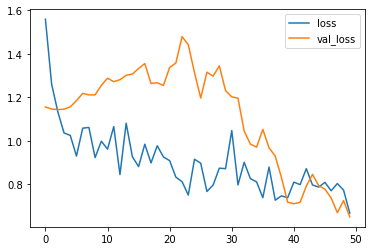

In [18]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

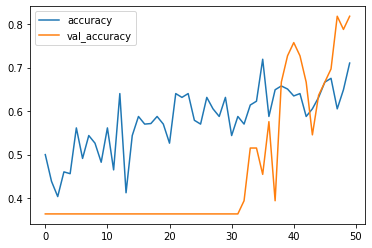

In [19]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()